### Importing the required Python libraries

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

### The dataset being used consists of data from used automobiles with the target/dependent variable being the attribute "price"

### Importing the dataset which is a csv file

In [164]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
#Reading the csv file into a pandas dataframe
auto_df = pd.read_csv(file_path, header = None )

### A quick look at top 5 rows from the dataset

In [165]:
auto_df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Adjusting the column names

In [166]:
#This particular dataset has the following column names
columns = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style","drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower", "peak-rpm","city-mpg","highway-mpg","price"]

In [167]:
auto_df.columns = columns
auto_df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

### Using the describe method to retrive some important statistics about the dataset. 

In [168]:
auto_df.describe()
#The describe method shows metrics for numeric data. However, if we include the argument (include = 'all'), we can see the metric data 
#for all attributes

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [169]:
auto_df.describe(include = 'all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


### Data cleaning

### The head() and describe() methods have revealed that this dataset has missing values. Dealing with missing values often depend on the data type of the attributes. For numeric attributes (INT and FLOAT), it might make sense to replace the missing data with the mean(average). In the case of attribute with "OBJECT" type, replacing missing values with the value that occurs most frequently might be the best solution. 
### Additionally, another aspect to consider is the frequency of missing values in an attribute and debating whether it makes sense to delete the attribute altogether. If this option is on the table, it's important to understand the importance that attribute plays

In [170]:
# Replacing missing values that are indicated as "?" with NaN(Not a Number). 
#The reason we do this is because Python understands that NaN is what represents missing values.
auto_df.replace("?", np.nan, inplace = True)
auto_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [171]:
missing_data = auto_df.isnull()
missing_data.head()
# True indicates that there is a missing value. False indicates that a value is present

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Using a "for" loop to identify the number of missing values (if any) in each attribute.

In [172]:
for x in auto_df.columns.values.tolist():
    print(x)
    print(missing_data[x].value_counts())
    print('')


symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

<b>1. Cleaning numeric attributes (int or float) by replacing missing values with the mean.</b>
    
<b>  2. Cleaning object attributes by replacing missing values with the most frequently occuring element. </b>

In [173]:
auto_df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [174]:
print(auto_df[['normalized-losses', 'num-of-doors', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']].dtypes)
print(auto_df[['normalized-losses', 'num-of-doors', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']].head())

normalized-losses    object
num-of-doors         object
bore                 object
stroke               object
horsepower           object
peak-rpm             object
price                object
dtype: object
  normalized-losses num-of-doors  bore stroke horsepower peak-rpm  price
0               NaN          two  3.47   2.68        111     5000  13495
1               NaN          two  3.47   2.68        111     5000  16500
2               NaN          two  2.68   3.47        154     5000  16500
3               164         four  3.19   3.40        102     5500  13950
4               164         four  3.19   3.40        115     5500  17450


#### From the above scripts, it appears that all 7 attributes are considered to be of the object data type. The following can be understood

1. Attributes bore, stroke, normalized losses, horsepower, peak-rpm and price clearly have numerical and fractional data elements which means they should be converted to the float data format

In [175]:
auto_df[['bore', 'stroke']] = auto_df[['bore', 'stroke']].astype('float')
auto_df[['bore', 'stroke']].dtypes

bore      float64
stroke    float64
dtype: object

### Replacing missing values in bore and stroke with their respective means

In [176]:
average_bore = auto_df['bore'].mean(axis = 0)
auto_df['bore'].replace(np.nan, average_bore, inplace = True)

average_stroke = auto_df['stroke'].mean(axis = 0)
auto_df['stroke'].replace(np.nan, average_stroke, inplace = True)


In [177]:
auto_df[['bore', 'stroke']].isnull().describe()
#This statement indicates that there are no missing values in either bore or stroke. Performing similar operations for the remaining attributes.

,bore,stroke
count,205,205
unique,1,1
top,False,False
freq,205,205


### The next step is to adjust the missing values for attributes normalized losses, horsepower, peak-rpm and price

In [178]:
auto_df[['normalized-losses', 'horsepower', 'price', 'peak-rpm']] = auto_df[['normalized-losses', 'horsepower', 'price', 'peak-rpm']].astype('float')
auto_df['normalized-losses'].replace(np.nan, auto_df['normalized-losses'].mean(), inplace = True)
auto_df['horsepower'].replace(np.nan, auto_df['horsepower'].mean(), inplace = True)
auto_df['peak-rpm'].replace(np.nan, auto_df['peak-rpm'].mean(), inplace = True)

### The attribute price is different to the other attributes since it is the target/dependent variable. Any row without price should therefore be removed instead of replacing the value. 

In [179]:
auto_df.dropna(subset = ['price'], axis = 0, inplace = True)
print(auto_df.price.describe())

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64


### Missing values in object type variables. The variable num-of-doors is categorical/object type. For this reason, the best approach to dealing with missing values would be to replace NaN with the most common data element

In [180]:
print(auto_df['num-of-doors'].describe())
print('\nFrom this statement, we can see that the element "four" occurs most frequently.')

count      199
unique       2
top       four
freq       113
Name: num-of-doors, dtype: object

From this statement, we can see that the element "four" occurs most frequently.


### Replace missing values in num-of-doors with the data element 'four' since this data element occurs most frequently in the attribute.

In [181]:
auto_df['num-of-doors'].replace(np.nan, 'four', inplace = True)
auto_df['num-of-doors'].isnull().value_counts()

False    201
Name: num-of-doors, dtype: int64

### Running the for loop again for missing values

In [182]:
missing_data2 = auto_df.isnull()
for column in auto_df:
    print(column)
    print(missing_data2[column].value_counts())
    print('')

symboling
False    201
Name: symboling, dtype: int64

normalized-losses
False    201
Name: normalized-losses, dtype: int64

make
False    201
Name: make, dtype: int64

fuel-type
False    201
Name: fuel-type, dtype: int64

aspiration
False    201
Name: aspiration, dtype: int64

num-of-doors
False    201
Name: num-of-doors, dtype: int64

body-style
False    201
Name: body-style, dtype: int64

drive-wheels
False    201
Name: drive-wheels, dtype: int64

engine-location
False    201
Name: engine-location, dtype: int64

wheel-base
False    201
Name: wheel-base, dtype: int64

length
False    201
Name: length, dtype: int64

width
False    201
Name: width, dtype: int64

height
False    201
Name: height, dtype: int64

curb-weight
False    201
Name: curb-weight, dtype: int64

engine-type
False    201
Name: engine-type, dtype: int64

num-of-cylinders
False    201
Name: num-of-cylinders, dtype: int64

engine-size
False    201
Name: engine-size, dtype: int64

fuel-system
False    201
Name: fuel-syst

### All missing values from all attributes have been dealt with successfully.

In [183]:
auto_df.reset_index(inplace = True, drop = True)
auto_df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
197,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
198,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
199,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


### An important step in data wrangling/cleaning is the creation of bins. This helps convert numerical attributes into categorical attributes with the focus on simplifying analysis

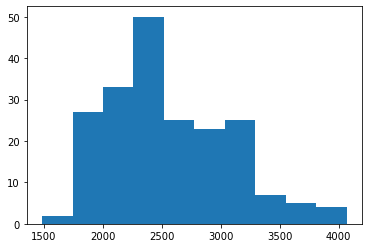

In [184]:
#Let us consider the attribute 'curb-weight'. Instead of the numberical data, it might be better to have categorical data such as 
#low weight, medium weight and heavy weight. 

%matplotlib inline
plt.hist('curb-weight', data = auto_df)
plt.show()

In [185]:
categories = ['low weight', 'medium weight', 'heavy weight']

bins = np.linspace(min(auto_df['curb-weight']), max(auto_df['curb-weight']), 4)

auto_df['curb-weight-binned'] = pd.cut(auto_df['curb-weight'], bins, labels = categories, include_lowest = True)

auto_df[['curb-weight','curb-weight-binned']]


,curb-weight,curb-weight-binned
0,2548,medium weight
1,2548,medium weight
2,2823,medium weight
3,2337,low weight
4,2824,medium weight
...,...,...
196,2952,medium weight
197,3049,medium weight
198,3012,medium weight
199,3217,heavy weight


## Now that the data is free of missing values, we can move on to exploratory data analysis where we can get a better picture of the dataset, uncover relationships between attributes and identify the important attributes

In [186]:
auto_df['curb-weight-binned'].value_counts()

medium weight    96
low weight       83
heavy weight     22
Name: curb-weight-binned, dtype: int64

### Correlation helps identify the dependencies and relationship between attributes. This is particularly important in regression analysis. 

In [187]:
print('Here we can see the correlation or the relationship between different variables and the dependent variable "price"\n')
print(auto_df.corr()['price'].sort_values())

Here we can see the correlation or the relationship between different variables and the dependent variable "price"

highway-mpg         -0.704692
city-mpg            -0.686571
peak-rpm            -0.101616
symboling           -0.082391
compression-ratio    0.071107
stroke               0.082269
normalized-losses    0.133999
height               0.135486
bore                 0.543155
wheel-base           0.584642
length               0.690628
width                0.751265
horsepower           0.809575
curb-weight          0.834415
engine-size          0.872335
price                1.000000
Name: price, dtype: float64


### Using scatter plots to better understand how different variables impact the dependent variable(price)

The scatter plot below shows the strong positive correlation that exists between horsepower and price. As horsepower increases, so does price. Therefore horsepower is one of the important attributes when it comes to predicting price


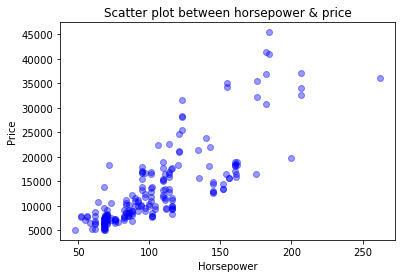

            horsepower       price
horsepower  100.000000   80.957457
price        80.957457  100.000000


In [188]:
%matplotlib inline
print('The scatter plot below shows the strong positive correlation that exists between horsepower and price. As horsepower increases, so does price. Therefore horsepower is one of the important attributes when it comes to predicting price')
x = auto_df['horsepower']
y = auto_df['price']
plt.scatter(x, y, color = 'blue', alpha = 0.4)

plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Scatter plot between horsepower & price')
plt.show()

print(auto_df[['horsepower', 'price']].corr()*100)